# Exemplo de Machine Learning 
 ######    ...................................  Dataset: Iris  ...................................
## Objetivos
### Entender sobre o Jupter Notebook
* Como iniciar
* Como ler datasets
* Manipulação da linguágem R no Notebook

### Conhecer o dataset da Iris
### Dividir a base para treinar
### Análise de dados
### Entender diferenças de modelos
### Análise de diferentes modelos
### Validar resultados

In [47]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [69]:
# define the filename
filename <- "iris.csv"
# load the CSV file from the local directory
dataset <- read.csv(filename, header=FALSE)
# set the column names in the dataset
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")

Warning message in file(file, "rt"):
“cannot open file 'iris.csv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


In [70]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

In [71]:
# dimensions of dataset
dim(dataset)

[1] 96  5

In [72]:
# list types for each attribute
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

In [73]:
# take a peek at the first 5 rows of the data
head(dataset)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa 
4 4.6          3.1         1.5          0.2         setosa 
7 4.6          3.4         1.4          0.3         setosa 
8 5.0          3.4         1.5          0.2         setosa

In [74]:
# list the levels for the class
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

In [75]:
# summarize the class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

freq percentage
setosa     32   33.33333  
versicolor 32   33.33333  
virginica  32   33.33333

In [76]:
# summarize attribute distributions
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.100   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.500   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.250   Median :1.300  
 Mean   :5.836   Mean   :3.033   Mean   :3.743   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.225   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :32  
 versicolor:32  
 virginica :32  
                
                
                

In [77]:
# split input and output
x <- dataset[,1:4]
y <- dataset[,5]

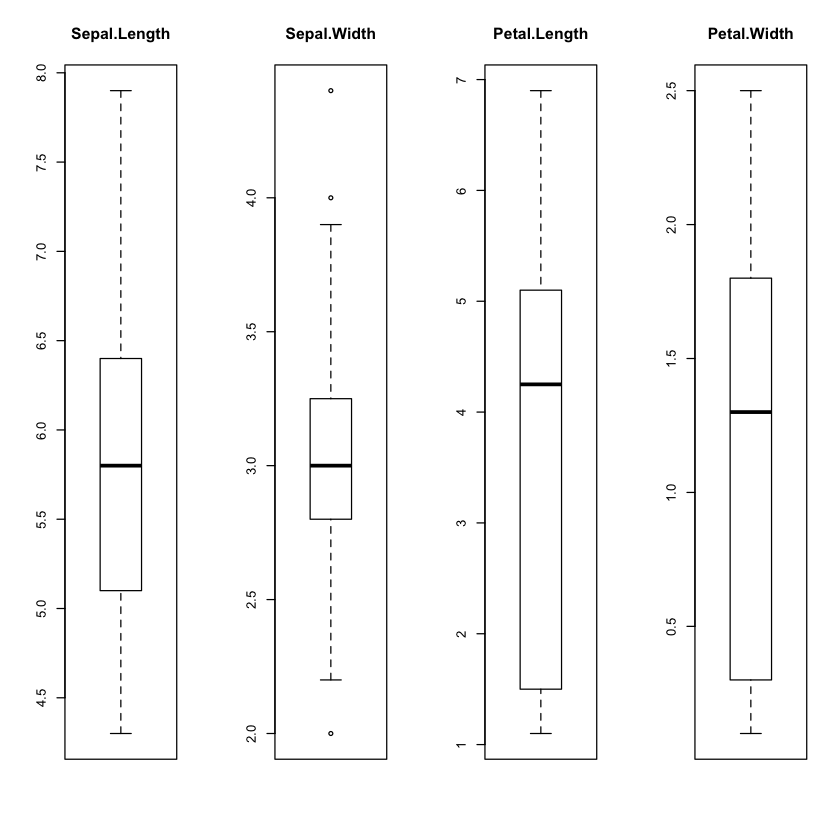

In [78]:
# boxplot for each attribute on one image
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

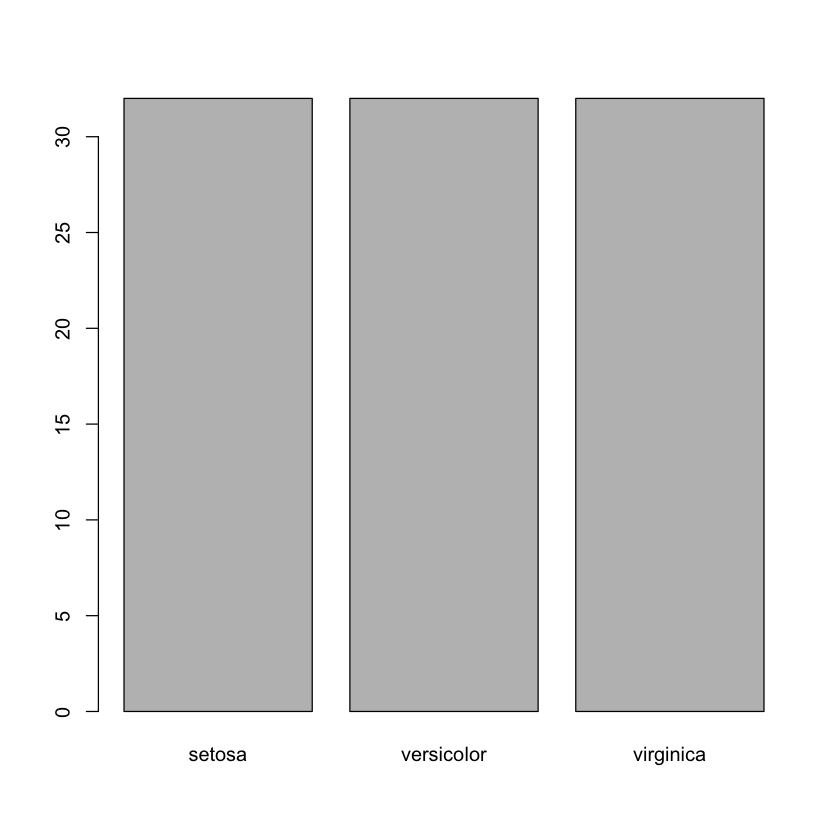

In [79]:
# barplot for class breakdown
plot(y)

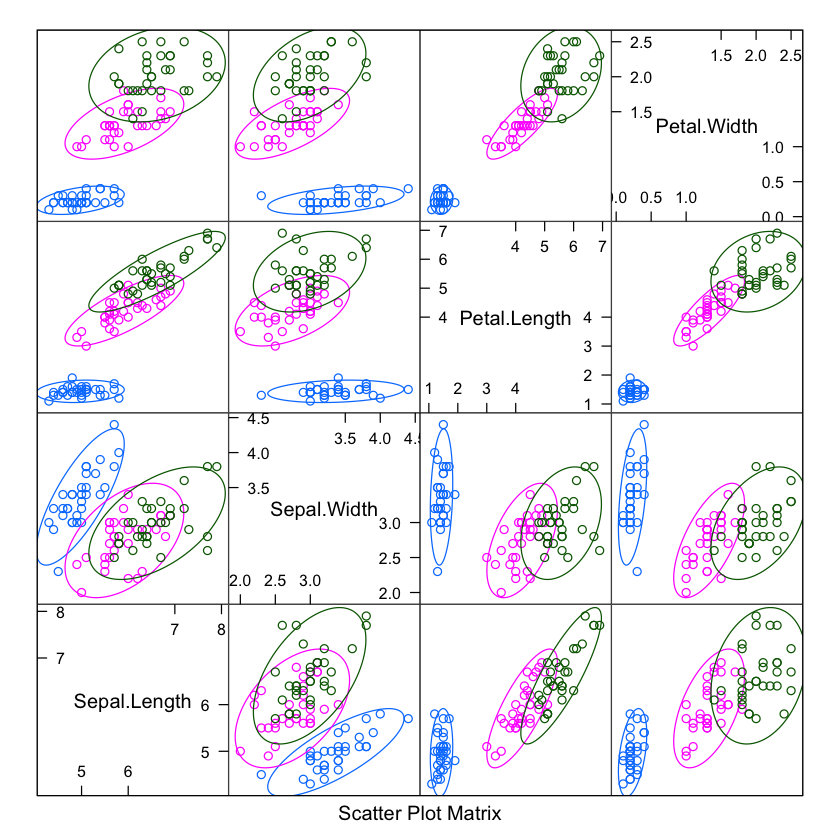

In [80]:
# scatterplot matrix
featurePlot(x=x, y=y, plot="ellipse")

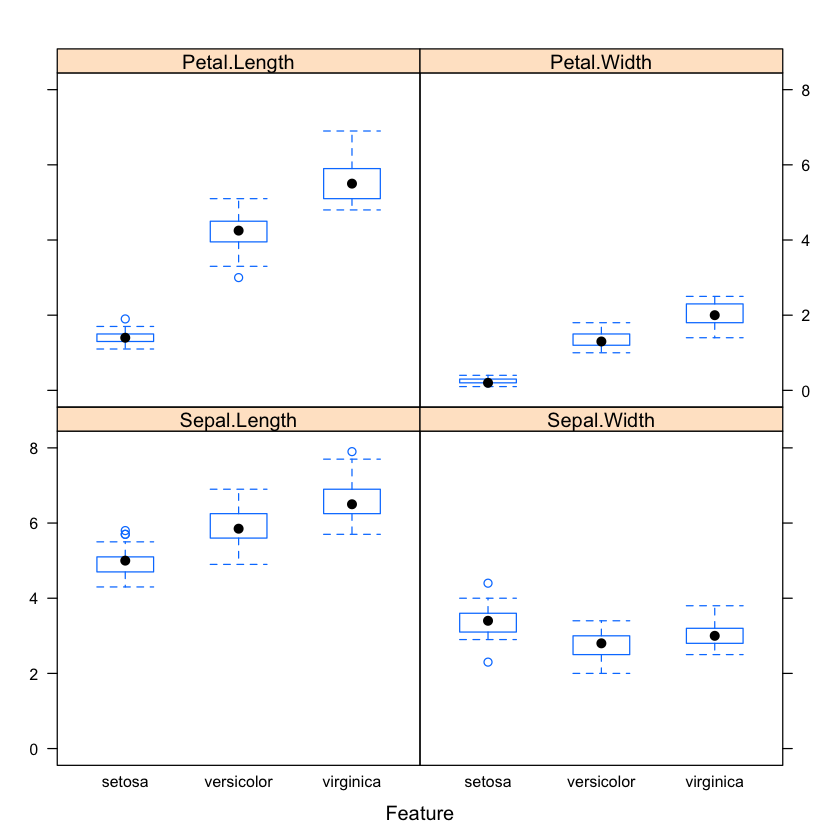

In [81]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

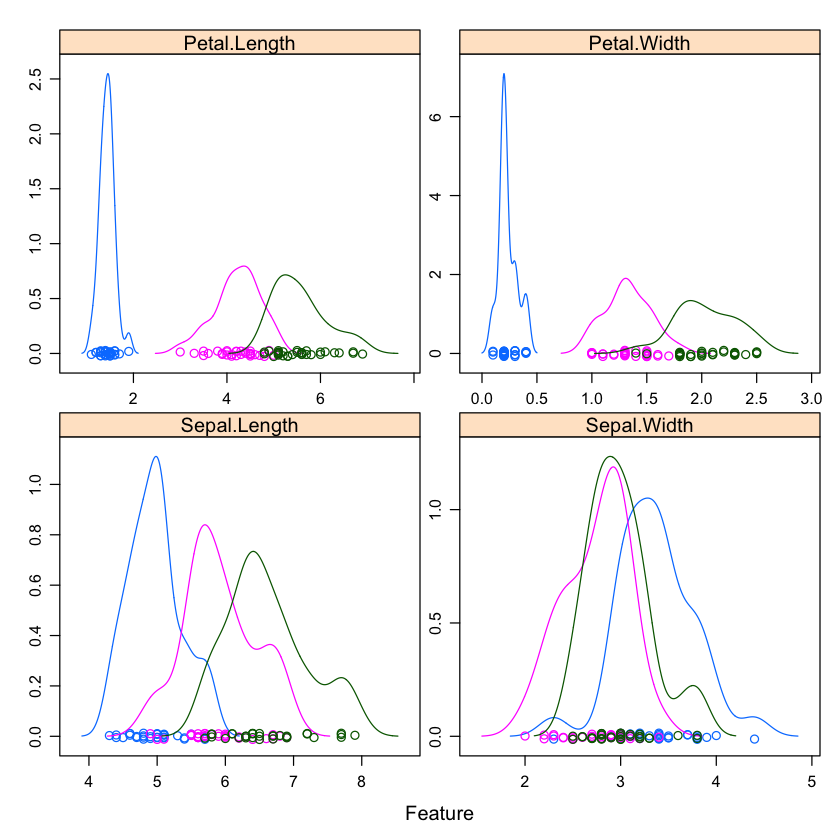

In [82]:
# density plots for each attribute by class value
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

In [83]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [84]:
# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

In [85]:
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu. Median      Mean 3rd Qu. Max. NA's
lda  0.8888889 0.9318182      1 0.9697980       1    1    0
cart 0.8000000 0.9022727      1 0.9497980       1    1    0
knn  0.9000000 1.0000000      1 0.9809091       1    1    0
svm  0.7777778 0.9318182      1 0.9586869       1    1    0
rf   0.8888889 0.9022727      1 0.9597980       1    1    0

Kappa 
          Min.   1st Qu. Median      Mean 3rd Qu. Max. NA's
lda  0.8333333 0.8981481      1 0.9546016       1    1    0
cart 0.6969697 0.8541091      1 0.9245247       1    1    0
knn  0.8484848 1.0000000      1 0.9712682       1    1    0
svm  0.6666667 0.8981481      1 0.9379349       1    1    0
rf   0.8333333 0.8541091      1 0.9396762       1    1    0


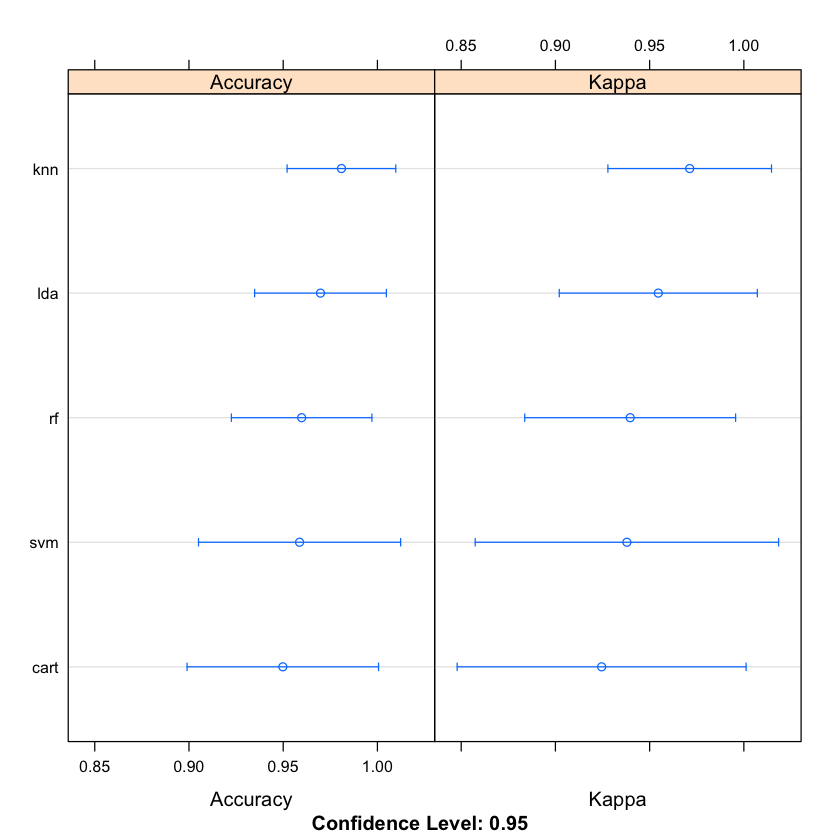

In [86]:
# compare accuracy of models
dotplot(results)

In [87]:
# summarize Best Model
print(fit.lda)

Linear Discriminant Analysis 

96 samples
 4 predictor
 3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 86, 87, 86, 87, 87, 86, ... 
Resampling results:

  Accuracy  Kappa    
  0.969798  0.9546016



In [88]:
# estimate skill of LDA on the validation dataset
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa          8          0         0
  versicolor      0          8         0
  virginica       0          0         8

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8575, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : 3.541e-12  
                                     
                  Kappa : 1          
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            0.3333           0.3333
Detection Rate